In [24]:
import pandas as pd
import re
import seaborn as sns

In [18]:
df = pd.read_excel('real_estate_sofia_50_pages.xlsx')
df.head()

,Real Estate Name,Location,Price (EUR),Size (m2)
0,"Гараж, паркомясто,61 м2","София, Малинова Долина",25 000 EUR,61
1,"Гараж, паркомясто,18 м2","София, Редута",43 000 EUR,18
2,"Парцел,600 м2","София, Овча Купел",70 000 EUR,600
3,"Парцел,377 м2","София, Люлин 6",45 000 EUR,377
4,"Гараж, паркомясто,46 м2","София, Дървеница",49 900 EUR,46


In order to perform some analysis we need to convert the price and the size to numeric attributes.
We can also remove the square meter size from the real estate name.

Some real estates do not have a speicific price (only when you ask)(призапитване)

In [19]:
# remove values which do not have a specific price
df = df[df['Price (EUR)'] != 'при запитване']

# replace the EUR part from the price values with an empty space
df['Price (EUR)'] = df['Price (EUR)'].str.replace('EUR', '')

# remove the empty space and convert to integer
df['Price (EUR)'] = df['Price (EUR)'].str.replace(' ', '').astype(int)

# remove the size and sq m2 from the RE name
df['Real Estate Name'] = df['Real Estate Name'].str.replace(r',\d+\s*м2', '', regex=True)

# create a price p/sq meter column
df['Price p/m2'] = (df['Price (EUR)']/df['Size (m2)']).round(0).astype(int)

df.head()

,Real Estate Name,Location,Price (EUR),Size (m2),Price p/m2
0,"Гараж, паркомясто","София, Малинова Долина",25000,61,410
1,"Гараж, паркомясто","София, Редута",43000,18,2389
2,Парцел,"София, Овча Купел",70000,600,117
3,Парцел,"София, Люлин 6",45000,377,119
4,"Гараж, паркомясто","София, Дървеница",49900,46,1085


Next, let us try to infer from the name of the real estate what type is it
(garage, 1/2/3/4 bedroom apartment, house, land, etc.)

In [11]:
df['Real Estate Name'].unique().tolist()

['Гараж, паркомясто',
 'Парцел',
 'Едностаен апартамент',
 'Двустаен апартамент',
 'Сграда, жилищна',
 'Магазин',
 'Тристаен апартамент',
 'Многостаен апартамент',
 'Офис',
 'Къща',
 'Четиристаен апартамент',
 'Мезонет',
 'Сграда',
 'Хотел',
 'Земеделски имот',
 'Ателие,Таван, Студио',
 'Склад',
 'Етаж от къща',
 'Заведение',
 'Сутерен, Мазе, Партер',
 'Търговски обект']

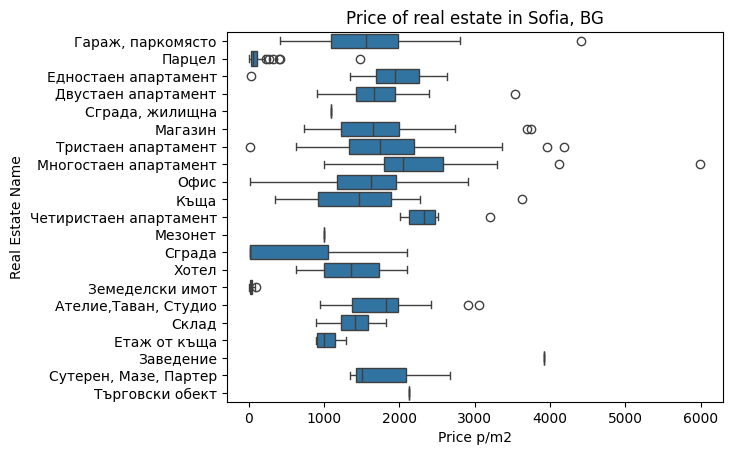

In [32]:
sns.boxplot(df, x = 'Price p/m2', y = 'Real Estate Name').set_title('Price of real estate in Sofia, BG');

Let's keep only real estates for living purposes

In [22]:
# list of real estates fro living purposes
living_re = ['Едностаен апартамент', 'Двустаен апартамент', 'Тристаен апартамент', 'Многостаен апартамент', 'Къща', 'Четиристаен апартамент', 'Мезонет']

df_living_re = df[df['Real Estate Name'].isin(living_re)]
df_living_re['Real Estate Name'].unique().tolist()

['Едностаен апартамент',
 'Двустаен апартамент',
 'Тристаен апартамент',
 'Многостаен апартамент',
 'Къща',
 'Четиристаен апартамент',
 'Мезонет']

In [23]:
df_living_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 5 to 575
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Real Estate Name  212 non-null    object
 1   Location          212 non-null    object
 2   Price (EUR)       212 non-null    int32 
 3   Size (m2)         212 non-null    int64 
 4   Price p/m2        212 non-null    int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 8.3+ KB


Text(0.5, 1.0, 'Price of living RE in Sofia')

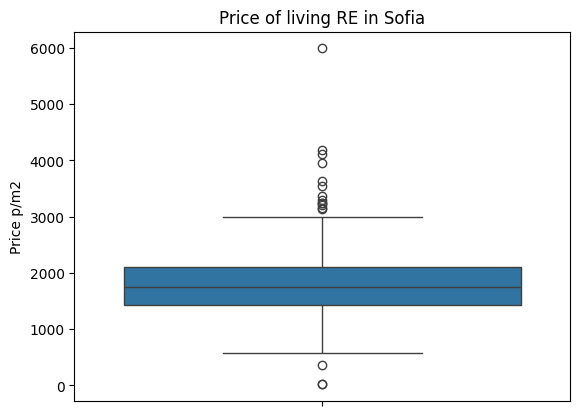

In [39]:
sns.boxplot(df_living_re, y = 'Price p/m2').set_title('Price of living RE in Sofia')

Let's see the most expensive neighbourhoods in Sofia

In [33]:
# remove Sofia from the Location column
df_living_re['Location'] = df_living_re['Location'].str.replace('София,', '')
df_living_re.head()

C:\Users\20184276\AppData\Local\Temp\ipykernel_22272\1315802379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_living_re['Location'] = df_living_re['Location'].str.replace('София,', '')


,Real Estate Name,Location,Price (EUR),Size (m2),Price p/m2
5,Едностаен апартамент,Драгалевци,60800,32,1900
6,Двустаен апартамент,Полигона,98254,59,1665
7,Едностаен апартамент,Овча Купел 2,95000,45,2111
8,Двустаен апартамент,Красна Поляна,98900,60,1648
9,Едностаен апартамент,Надежда 4,92900,50,1858


In [53]:
# Group by neighbourhood to see avg price for each
df_neighburhood_grouped = df_living_re.groupby('Location')['Price p/m2'].mean().reset_index()
df_neighburhood_grouped.sort_values(by='Price p/m2', ascending=False)

,Location,Price p/m2
7,Гео Милев,4185.000000
19,Изгрев,3953.000000
42,Манастирски ливади Изток,3536.000000
29,Лозенец,3247.333333
70,Център,3199.333333
...,...,...
51,Нови Искър (гр.),889.000000
39,Мало Бучино,863.333333
3,Ботунец,861.250000
68,Филиповци,794.000000
